In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import polars as pl
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

2532
3362
{'Author': 0.02, 'Title': 0.02, 'Type of Ban': 57.04, 'State': 0.0, 'District': 0.0, 'Date of Challenge/Removal': 0.0, 'Origin of Challenge': 0.0, 'Ban Status': 42.96}
(5894, 9)
5310


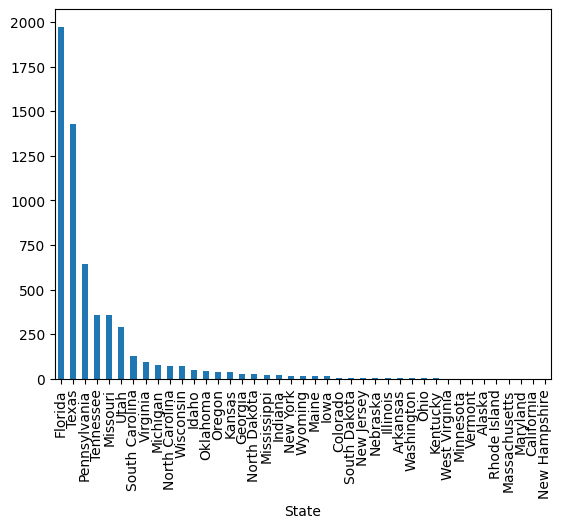

In [164]:
def null_pct(df):
    return dict(zip(df.columns, [round(100*len(df.loc[df[c].isnull()])/len(df),2) for c in df.columns]))
pen_path_2021 = "PEN America's Index of School Book Bans (July 1, 2021 - June 30, 2022).xlsx"
pen_21_df = pd.read_excel(pen_path_2021, sheet_name='Sorted by Author & Title', skiprows=2)
print(len(pen_21_df))
pen_path_2022 = "PEN America's Index of School Book Bans (July 1, 2022 - June 30, 2023).xlsx"
pen_22_df = pd.read_excel(pen_path_2022, sheet_name='Sorted by Author & Title', skiprows=2)
print(len(pen_22_df))
pen_df = pd.concat((pen_21_df, pen_22_df), axis=0, ignore_index=True)\
    .drop(['Secondary Author(s)', 'Illustrator(s)', 'Translator(s)', 'Series Name'], axis=1)

print(null_pct(pen_df))
pen_df = pen_df.rename(columns={'Date of Challenge/Removal': 'DateBan'}).drop_duplicates()
pen_df['Country'] = 'USA'
#pen_df['DateBan'] = pd.to_datetime(pen_df['DateBan'])
print(pen_df.shape)
pen_df.groupby('State').size().sort_values(ascending=False).plot.bar()
pen_df = pen_df.loc[~pen_df['DateBan'].apply(lambda x: isinstance(x, str)),:]
print(len(pen_df))

<Axes: xlabel='DateBan'>

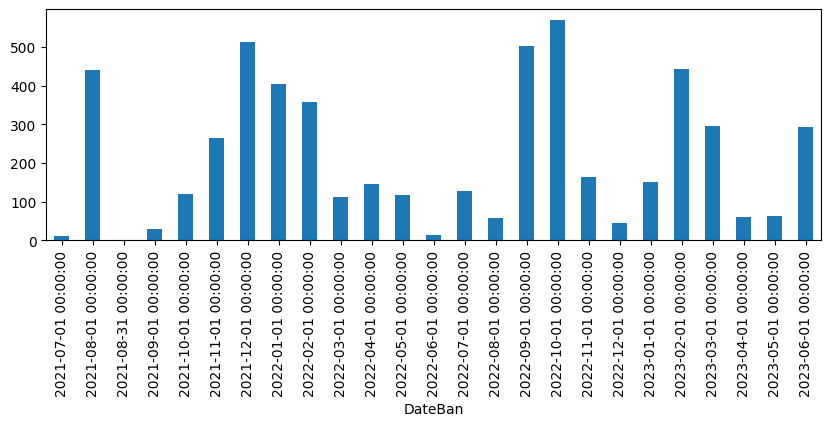

In [177]:
pen_df.groupby('DateBan').size().plot.bar(figsize=(10,3))

<Axes: xlabel='Title'>

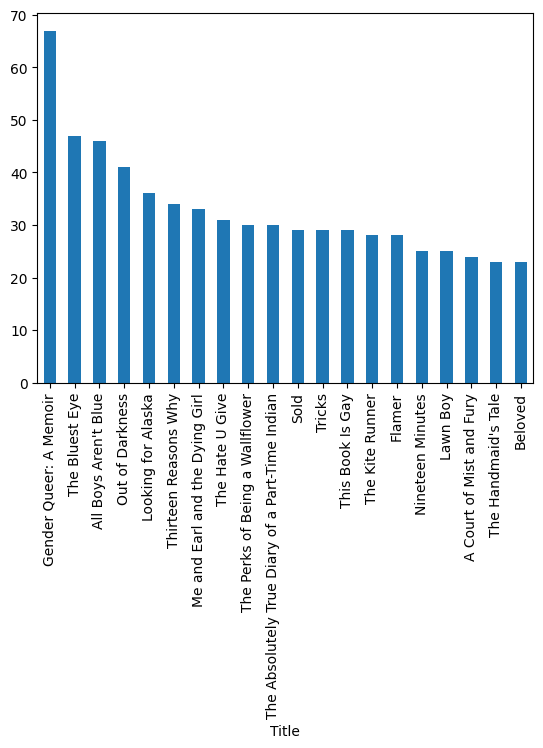

In [178]:
pen_df.groupby('Title').size().sort_values(ascending=False)[:20].plot.bar()

In [156]:
lidrekon_df = pd.read_csv('lidrekon.csv').rename(columns={'Date':'DateBan'})
lidrekon_df = lidrekon_df.drop([lidrekon_df.columns[0], 'TitleCandidates'], axis=1)\
                .drop_duplicates()
lidrekon_df['Country'] = 'RUS'
lidrekon_df['DateBan'] = pd.to_datetime(lidrekon_df['DateBan'])
print(lidrekon_df.dtypes)
print(null_pct(lidrekon_df))
print(lidrekon_df.head())
print(lidrekon_df.shape)

DateBan        datetime64[ns]
Description            object
Title                  object
Country                object
dtype: object
{'DateBan': 0.0, 'Description': 0.0, 'Title': 0.08, 'Country': 0.0}
              DateBan                                        Description  \
0 2024-04-27 02:33:20  Музыкальная композиция "SKVERNA", продолжитель...   
1 2024-03-11 12:46:18  Информационный материал – публикация (статья) ...   
2 2024-03-11 12:45:09  Листовка "Исполнительного комитета Совета наро...   
3 2024-01-15 04:04:18  Музыкальная композиция "i..ш русню", продолжит...   
4 2023-12-28 01:19:07  Текстовый материал "Протокол регистрации прест...   

                                               Title Country  
0                                            SKVERNA     RUS  
1  К десятилетию Кёнделенского противостояния 14-...     RUS  
2  Исполнительного комитета Совета народных депут...     RUS  
3                                         i..ш русню     RUS  
4  Протокол регистрации пр

<Axes: xlabel='DateBan'>

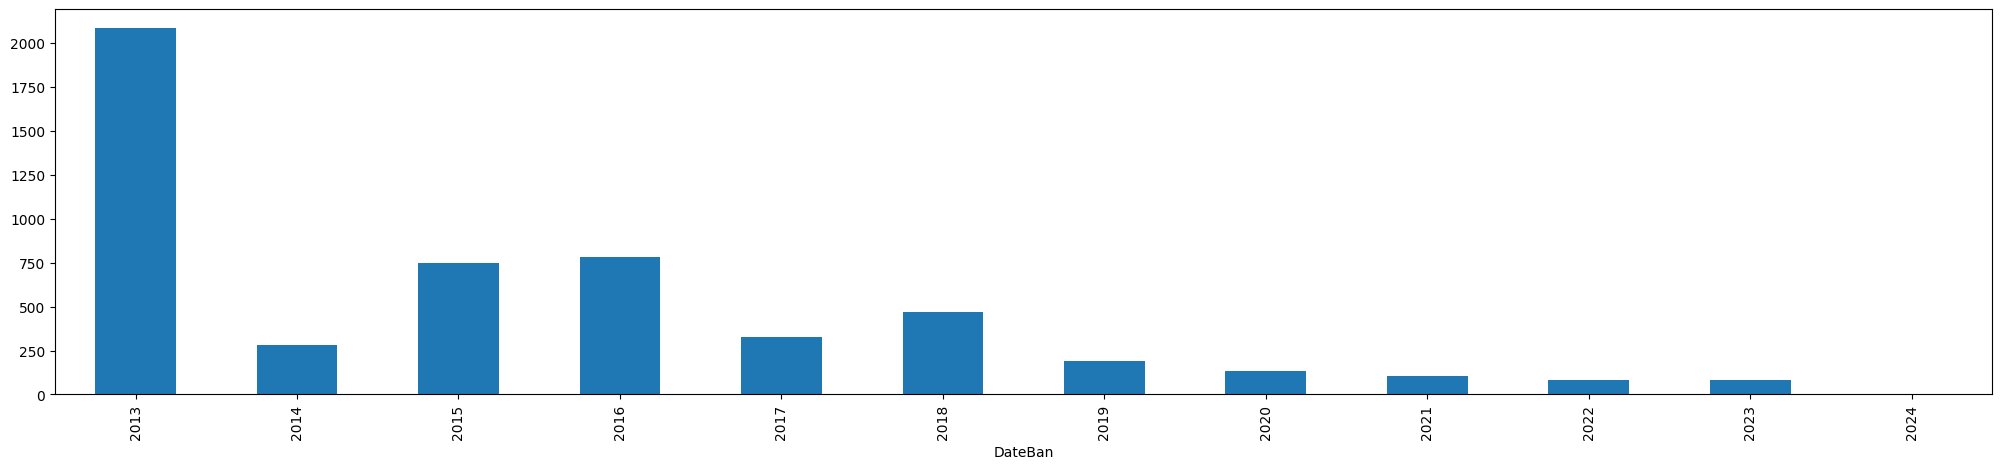

In [190]:
lidrekon_df.groupby([lidrekon_df['DateBan'].dt.year])\
    .size().plot.bar(figsize=(25,5))

In [197]:
lidrekon_df.groupby('Author').size().sort_values(ascending=False)[:20].plot.bar()

KeyError: 'Author'

In [157]:
df = pd.concat((pen_df, lidrekon_df), axis=0, ignore_index=True)
print(df.shape)
print(null_pct(df))
print(df.dtypes)

(10595, 10)
{'Author': 49.89, 'Title': 0.05, 'Type of Ban': 76.1, 'State': 49.88, 'District': 49.88, 'DateBan': 0.0, 'Origin of Challenge': 49.88, 'Ban Status': 73.78, 'Country': 0.0, 'Description': 50.12}
Author                 object
Title                  object
Type of Ban            object
State                  object
District               object
DateBan                object
Origin of Challenge    object
Ban Status             object
Country                object
Description            object
dtype: object


In [122]:
kasseler_df = pd.read_csv('kasseler.csv')
kasseler_df = kasseler_df.drop(kasseler_df.columns[0], axis=1)
kasseler_df = kasseler_df.rename(columns={
    'author': 'Author', 'title':'Title', 'place':'District', 'date':'Date',
    'location':'Country', 'year': 'Year', 'lifed':'DateLifted', 'source':'Description'})
print(null_pct(kasseler_df))
print(kasseler_df.shape)

{'Author': 15.2, 'Title': 0.01, 'District': 71.93, 'Date': 69.23, 'Country': 0.02, 'Year': 53.69, 'lifted': 90.03, 'Description': 0.02}
(121573, 8)


In [123]:
kasseler_df['DateBan'] = kasseler_df['Year'].where(~kasseler_df['Year'].isnull(),
                                                   other=kasseler_df['Date'])
kasseler_df = kasseler_df.drop(['Date', 'Year'], axis=1)
def clean_year(x):
    try:
        if type(x)!=str:
            x = str(int(x))
        if len(x)>=4 and x[:4].isnumeric():
            return x[:4]
        return None
    except:
        return None
kasseler_df['DateBan'] = kasseler_df['DateBan'].apply(clean_year)
#kasseler_df['DateBan'] = pd.to_datetime(kasseler_df['DateBan'], format='%Y')
print(null_pct(kasseler_df))
print(kasseler_df.head())

{'Author': 15.2, 'Title': 0.01, 'District': 71.93, 'Country': 0.02, 'lifted': 90.03, 'Description': 0.02, 'DateBan': 29.57}
                          Author  \
0                              *   
1  * Mademoiselle la Comtesse de   
2                             **   
3                             **   
4                             **   

                                               Title District Country lifted  \
0                                         A Campanha      NaN     PRT    NaN   
1          Memoires de Mademoiselle la Comtesse de *      NaN     AUT    NaN   
2  Die Franzosen so wie sie sind, geschildert von...      NaN     AUT    NaN   
3  Der Zwang zum Klosterleben. Ein Schauspiel in ...      NaN     AUT    NaN   
4  Angenehme Beschäftigungen in der Einsamkeit, o...      NaN     AUT    NaN   

                                         Description DateBan  
0  Livros Proibidos dos Anos da Ditadura de 1933 ...    1965  
1  Österreichische Listen verbotener Bücher von 1...

<Axes: xlabel='Title'>

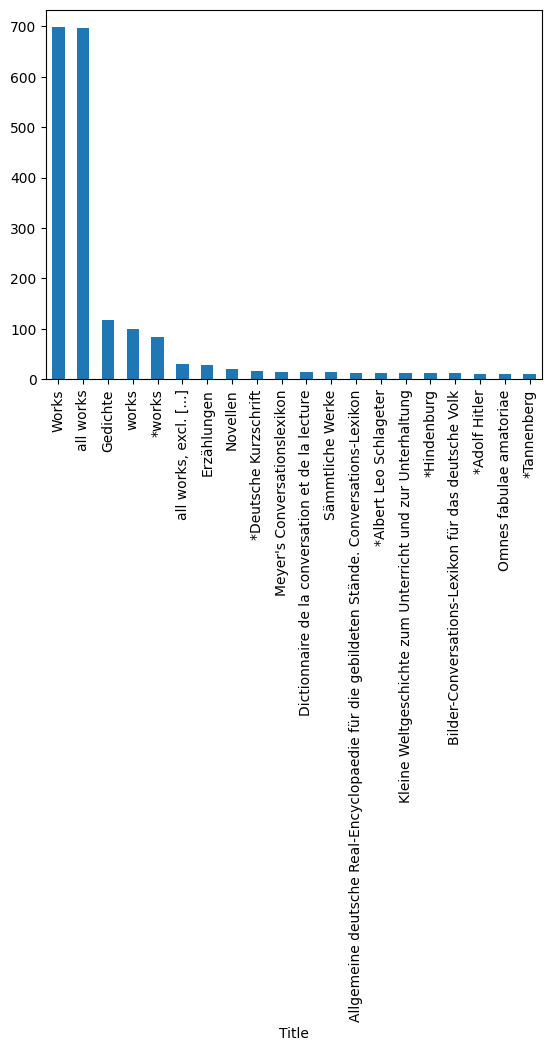

In [200]:
kasseler_df.groupby('Title').size().sort_values(ascending=False)[:20].plot.bar()

In [132]:
print(len(kasseler_df.dropna(subset='DateBan').loc[kasseler_df.dropna(subset='DateBan')['DateBan'].astype(int)<1677, :]))

874


In [93]:
kasseler_df['Country'].unique()

array(['PRT', 'AUT', 'USA/Texas', 'ITA', 'NLD', 'GC', 'TUR', 'VAT', 'DEU',
       'RSA', 'ARG', 'NGA', 'NGA, MYS', 'CHN', 'GRC', 'AUS', 'BLR', 'DZA',
       'ZAF', 'CHL', 'ESP', 'USA', 'POL', 'QAT', nan, 'DEU, Kurbayern',
       'FRA', 'DDR', 'DDR, CHN', 'IRL', 'VAE (Dubai)', 'USA/ RUS / ITA',
       'IRL, NZL, AUS', 'GBR', 'UdSSR/ DDR', 'DEU, Schlesien, Görlitz',
       'Soviet Union', 'LBN', 'USA, school district in Wisconsin', 'CAN',
       'USA, Savannah, GA, AP English class', 'KOR',
       'USA, Bay District School board', 'POL, Schlesien, Breslau', 'NZL',
       'UdSSR', 'RUS', 'AUS, NZL, DEU',
       'USA, high school reading lists and schools in Pennsylvania, Wisconsin and Washington state',
       'GRC, DEU, USA, CHN', 'SOM', 'IRN', 'DEU, Herzogtum Württemberg',
       'DEU, Preußen', 'DEU, Preußen und andere Kleinstaaten',
       'VAT, FRA, USA', 'FRA, Straßburg', 'LBN, USA (Alabama)',
       'DEU, Kurmainz', 'Western Zones of Occupation',
       'Westliche Besatzungszonen /

In [92]:
kasseler_df['Country'].str.split('/')
#.apply(lambda x : x[0] if type(x)==list else None).unique()

0         [PRT]
1         [AUT]
2         [AUT]
3         [AUT]
4         [AUT]
          ...  
121568    [CMR]
121569    [CMR]
121570    [CMR]
121571    [CMR]
121572    [NLD]
Name: Country, Length: 121573, dtype: object

In [81]:
"""kasseler_df['State'] = kasseler_df['Country'].where(lambda x : 'USA' not in x,                                 
                    other=kasseler_df['Country'].str.split('/')[1])
kasseler_df['Country'] = kasseler_df['Country'].where(lambda x : 'USA' not in x,
                    other=kasseler_df['Country'].str.split('/')[0])"""
kasseler_df['State'] = kasseler_df['Country'].str.split('/')[1]
kasseler_df['State'] = kasseler_df['Country'].str.split('/')[0]

ValueError: Length of values (1) does not match length of index (121573)